In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
spain_data = pd.read_csv('Predata/GUILLE/Spain_CURADO.csv', low_memory=False)

In [5]:
spain_data.head(2)

,ANS_Party,Record.ID,Attempt,IP.Address,Browser,Version,Platform,Mobile,Timestamp,X.Placement,...,Petition,Boycot,MaxParty,MaxParty_NA,MaxParty_Rep,Preferido_Partido_Pref.F,Partido_Pref.Comparado.F,english,Partido_Maximo,Partido_Preferido
0,19.0,203846,1,30c55d031f11e6bdd84db7abb2e1241c,iPhone,7,iPhone,1,5/20/2014 6:31,NaN,...,NaN,NaN,NaN,172334,NaN,NaN,NaN,PP,NaN,PP
1,19.0,100086,1,68fe4acce80979ac9e4229ffa206a2cd,Internet Explorer,9,Windows,0,5/9/2014 3:12,5.0,...,NaN,NaN,10.0,172334,1.0,DD_PP,PP,PP,PP,PP


In [6]:
spain_data.columns

Index([u'ANS_Party', u'Record.ID', u'Attempt', u'IP.Address', u'Browser',
       u'Version', u'Platform', u'Mobile', u'Timestamp', u'X.Placement',
       ...
       u'Petition', u'Boycot', u'MaxParty', u'MaxParty_NA', u'MaxParty_Rep',
       u'Preferido_Partido_Pref.F', u'Partido_Pref.Comparado.F', u'english',
       u'Partido_Maximo', u'Partido_Preferido'],
      dtype='object', length=201)

In [7]:
df = spain_data

In [10]:
for el in df.columns:
    print(el): 

ANS_Party
Record.ID
Attempt
IP.Address
Browser
Version
Platform
Mobile
Timestamp
X.Placement
Y.Placement
Z.Placement
language
http_referer
sq1t
sq2t
sl2at
sl2bt
sl2ct
dd1t
optint
SupQ_1
SupQ_2
SupQ_3
SupQ_4
SupQ_5
SupQ_6
SupQ_7
SupQ_8
SupQ_9
SupQ_10
SupQ_11
SupQ_12
SupQ_13
SupQ_14
SupQ_15
SupQ_16
SupQ_17
SupQ_18
SupQ_19
SupQ_20
SL1_PP
SL1_PSOE
SL1_IU
SL1_UpyD
SL1_PNV_CiU
SL1_ERC
SL1_BNG_Bildu
SL1_Podemos
SL2_PP
SL2_PSOE
SL2_IU
SL2_UpyD
SL2_PNV_CiU
SL2_ERC
SL2_BNG_Bildu
SL2_Podemos
SL3_PP
SL3_PSOE
SL3_IU
SL3_UpyD
SL3_PNV_CiU
SL3_ERC
SL3_BNG_Bildu
SL3_Podemos
DD_PP
DD_PSOE
DD_IU
DD_UpyD
DD_PNV_CiU
DD_ERC
DD_BNG_Bildu
DD_Podemos
DD_Equo
DD_VOX
Ans_1
RTime_1
Ans_2
RTime_2
Ans_3
RTime_3
Ans_4
RTime_4
Ans_5
RTime_5
Ans_6
RTime_6
Ans_7
RTime_7
Ans_8
RTime_8
Ans_9
RTime_9
Ans_10
RTime_10
Ans_11
RTime_11
Ans_12
RTime_12
Ans_13
RTime_13
Ans_14
RTime_14
Ans_15
RTime_15
Ans_16
RTime_16
Ans_17
RTime_17
Ans_18
RTime_18
Ans_19
RTime_19
Ans_20
RTime_20
Ans_21
RTime_21
Ans_22
RTime_22
Ans_23
RTime_23
A

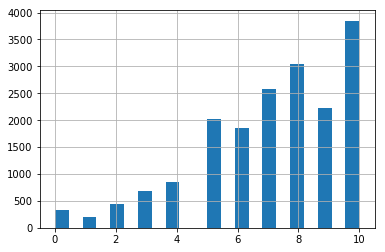

In [162]:
df.loc[(df['language']=='castellano') & ((df['SupQ_7'] == 119) | (df['SupQ_7'] == 120)), 'SL3_PSOE'].hist(bins=22)

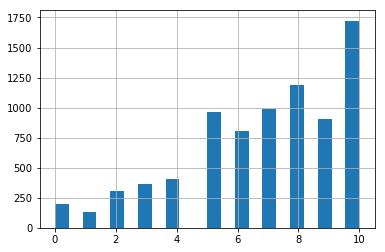

In [163]:
df.loc[(df['language']=='catalan') & ((df['SupQ_7'] == 119) | (df['SupQ_7'] == 120)), 'SL3_PSOE'].hist(bins=22)

In [145]:
df['SupQ_7'] == 119

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
281529    False
281530    False
281531    False
281532     True
281533    False
281534    False
281535    False
281536    False
281537    False
281538    False
281539    False
281540    False
281541    False
281542    False
281543    False
281544    False
281545    False
281546    False
281547    False
281548    False
281549    False
281550    False
281551    False
281552    False
281553    False
281554    False
281555    False
281556    False
281557    False
281558    False
Name: SupQ_7, dtype: boo

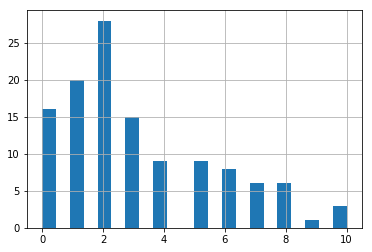

In [128]:
df.loc[df['language']=='galego', 'SL3_BNG_Bildu'].hist(bins=22)

**X.Placement, Y..., Z...**: Subjectivos (ecónomico: 0 izq, social: 0 izq, y europeo 0 anti)

**Close.Party** Subjetive Party identification ???

**European.Prefered.Party** Subjetive favourite party

**MaxParty**: The one with highest probability to be voted after taking the test

In [25]:
df['Timestamp']

castellano    251661
catalan        19303
galego          7103
euskera         2166
english         1324
gallego            2
Name: language, dtype: int64

In [27]:
df.head(1)['sq1t']

0    0
Name: sq1t, dtype: int64

In [80]:
df.describe().loc[:,'Close.Party']

count    206353.000000
mean         10.549723
std           6.220726
min           1.000000
25%           5.000000
50%           9.000000
75%          17.000000
max          18.000000
Name: Close.Party, dtype: float64

In [135]:
df.loc[df['language']=='catalan','National.Preferred'].value_counts()

16.0    4244
17.0    2375
8.0     2045
15.0    1671
19.0    1226
10.0    1174
6.0      745
18.0     631
2.0      388
13.0     214
14.0     176
4.0       53
7.0       49
3.0       39
1.0       38
5.0       19
11.0       8
9.0        7
12.0       5
Name: National.Preferred, dtype: int64

In [136]:
df['SupQ_7'].value_counts()

123.0    38558
120.0    24108
111.0    22623
119.0    21598
122.0    12472
117.0    10398
126.0     7916
109.0     7610
115.0     6825
118.0     6543
112.0     6482
113.0     6211
114.0     5024
124.0     4849
121.0     3012
116.0     2478
125.0     2186
127.0     1235
130.0     1029
110.0      621
129.0      137
128.0      130
Name: SupQ_7, dtype: int64

In [99]:
(df['European.Prefered.Party'] == df['National.Preferred']).sum()

69405

-----------------------

ERC visto desde catalanoparlantes y españoles

In [ ]:
df.loc[df['language']=='catalan', 'SL2_ERC'].hist(bins=22)
df.loc[df['language']=='castellano', 'SL2_ERC'].hist(bins=22)

df.loc[df['language']=='catalan', 'SL3_ERC'].hist(bins=22)
df.loc[df['language']=='castellano', 'SL3_ERC'].hist(bins=22)

df.loc[df['language']=='euskera', 'SL3_PNV_CiU'].hist(bins=22)
df.loc[df['language']=='catalan', 'SL3_PNV_CiU'].hist(bins=22)
df.loc[df['language']=='castellano', 'SL3_PNV_CiU'].hist(bins=22)

Solo los catalanes-valencianos

In [ ]:
df.loc[(df['language']=='castellano') & ((df['SupQ_7'] == 119) | (df['SupQ_7'] == 120)), 'SL3_ERC'].hist(bins=22)
df.loc[(df['language']=='catalan') & ((df['SupQ_7'] == 119) | (df['SupQ_7'] == 120)), 'SL3_ERC'].hist(bins=22)